Student Name: **Siera Q. Hallig**

Course Code: **CSEL302 | Introduction to Intelligent Systems**

*Week No. 9*

# **Part 1: Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

*1. Load the Dataset*

In [ ]:
data = pd.read_csv('Netflix_Userbase.csv')

*2. . Handle Missing Values*

In [ ]:
print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)

X = pd.get_dummies(data.drop(columns=['Monthly Revenue']), drop_first=True)
y = data['Monthly Revenue']

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


*3. Encode Categorical Variables*

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

*4. Feature Selection*

In [ ]:
data_encoded.head(100)

,User ID,Monthly Revenue,Age,Subscription Type_Premium,Subscription Type_Standard,Join Date_01-05-23,Join Date_01-06-22,Join Date_01-07-22,Join Date_01-08-22,Join Date_01-09-22,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Gender_Male,Device_Smart TV,Device_Smartphone,Device_Tablet
0,1,10,28,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,2,15,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,12,42,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,4,12,51,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10,33,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,14,32,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,97,10,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
97,98,13,31,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
98,99,12,29,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


# **Part 2: Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

*1. Descriptive Statistics*

In [ ]:
print(data.describe())

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


*2. Visualizations*

*   **Distribution of Monthly Revenue.**




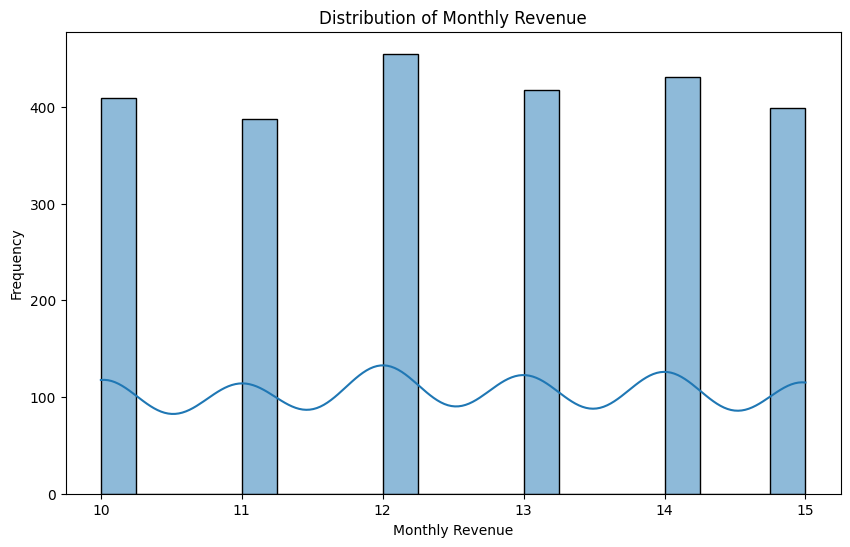

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly Revenue'], bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

*    **User Demographics**



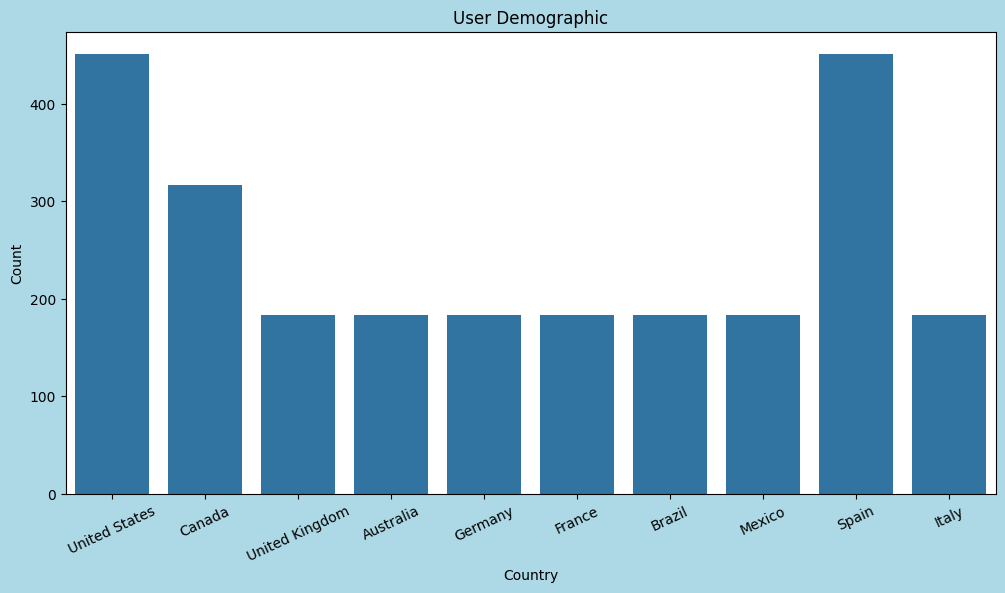

In [ ]:
plt.figure(figsize=(12, 6), facecolor = 'lightblue')
sns.countplot(x='Country', data=data)
plt.title('User Demographic')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()

# **Part 3: Linear Regression Model (Predicting Monthly Revenue)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

*1. Build the Model*

In [ ]:
X = data_encoded.drop(['User ID', 'Monthly Revenue'], axis=1)
y = data_encoded['Monthly Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

print('Slope: ', slope)
print('Intercept: ', intercept)

Slope:  -0.007171563890830623
Intercept:  13.906556148996602


*2. Model Evaluation*

In [ ]:
y_pred = lr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("\nLinear Regression Model Evaluation:")
print("\nR-squared:\n", r_squared)
print("\nRoot Mean Squared Error:\n", rmse)


Linear Regression Model Evaluation:

R-squared:
 -3.871091437948156e+17

Root Mean Squared Error:
 1.8019423146739808


*Visualizing the Model*

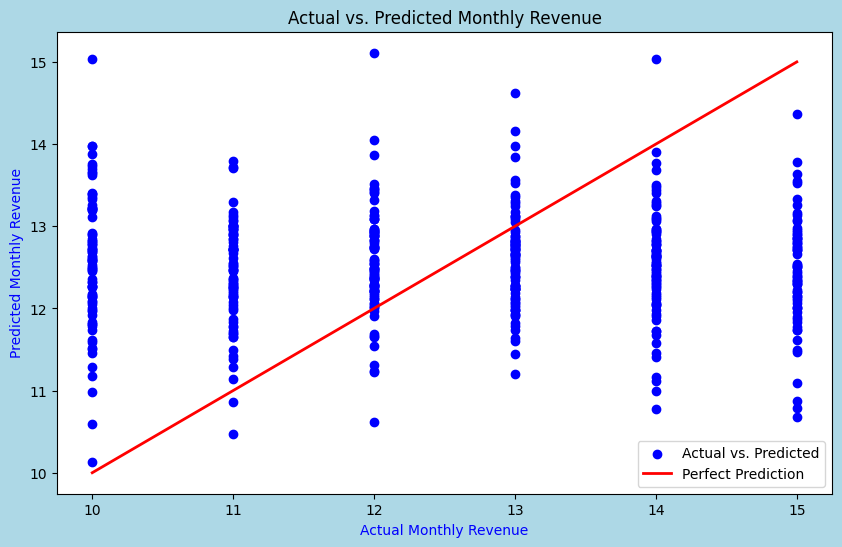

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightblue')
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=2, color='red', label='Perfect Prediction')
plt.title('Actual vs. Predicted Monthly Revenue')
plt.xlabel('Actual Monthly Revenue', color='blue')
plt.ylabel('Predicted Monthly Revenue', color='blue')
plt.legend()
plt.show()

# **Part 4: Logistic Regression Model (Predicting Customer Feedback)**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

*1. Model Building*

In [ ]:
X_logistic = data_encoded.drop(['User ID'], axis=1)
y_logistic = data_encoded['Age'] # Since there are no feedback in the data, I used Age as a substitute instead.
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.2, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*2. Evaluation*

In [ ]:
y_pred_logistic = logistic_model.predict(X_test_logistic)
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic, average='weighted')
recall = recall_score(y_test_logistic, y_pred_logistic, average='weighted')
f1 = f1_score(y_test_logistic, y_pred_logistic, average='weighted')
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.11
Precision: 0.1292377233301614
Recall: 0.11
F1 Score: 0.10740883388705749
Confusion Matrix:
 [[2 3 3 2 2 0 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [8 3 4 3 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 4 5 2 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 1 4 2 0 1 1 0 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 5 1 0 4 1 1 0 0 0 3 0 1 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 2 2 1 3 2 1 1 2 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 1 2 4 1 2 0 3 1 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 3 2 0 0 2 4 1 0 1 2 3 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 2 2 1 0 2 0 0 1 0 4 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 0 3 2 2 0 4 0 2 2 2 1 0 0 0 0 0 0 0]
 [0 0 0 0 3 1 1 4 2 1 2 0 2 0 3 3 2 1 1 1 0 2 1 0 0]
 [0 0 0 0 2 0 3 1 4 1 0 0 2 1 1 1 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 1 1 0 1 1 2 1 1 3 0 2 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 2 1 2 0 3 2 0 1 2 0 1 0 0 2 4 0 0]
 [0 0 0 0 0 0 0 0 4 0 1 1 4 2 6 1 0 1 1 0 1 2 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 2 2 4 2 3 0 0 0 4 1 1 2 0]
 [0 0 0 0 0 0 0 0 1 1 2 1 3 0 1 0 0 0 0 0 0 5

# **Part 5: Comparative Analysis and Visualization**

*1. Feature Importance*

*   **Feature Importance for Linear Regression**

In [ ]:
lr_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
lr_coefficients = lr_coefficients.sort_values(by='Coefficient', ascending=False)
print(lr_coefficients)

                Feature  Coefficient
256  Join Date_27-02-23     1.854064
47   Join Date_05-09-21     1.852146
266  Join Date_27-11-22     1.829137
219  Join Date_23-03-23     1.622774
189  Join Date_20-01-23     1.622537
..                  ...          ...
210  Join Date_22-04-22    -3.482587
227  Join Date_23-11-21    -3.493425
230  Join Date_24-01-22    -3.532228
200  Join Date_21-04-22    -3.546946
103  Join Date_11-01-23    -3.727277

[340 rows x 2 columns]


*  **Feature Importance for Logistic Regressio**n

In [ ]:
logistic_coefficients = pd.DataFrame({'Feature': X_logistic.columns, 'Coefficient': logistic_model.coef_[0]})
logistic_coefficients = logistic_coefficients.sort_values(by='Coefficient', ascending=False)
print(logistic_coefficients)

                        Feature  Coefficient
0               Monthly Revenue     0.685203
97           Join Date_10-06-23     0.150735
319  Last Payment Date_22-06-23     0.149976
336       Country_United States     0.128497
2     Subscription Type_Premium     0.112975
..                          ...          ...
339           Device_Smartphone    -0.030914
340               Device_Tablet    -0.031684
3    Subscription Type_Standard    -0.036585
337                 Gender_Male    -0.062731
1                           Age    -0.636526

[341 rows x 2 columns]


*   **Visualization of Feature Importance**

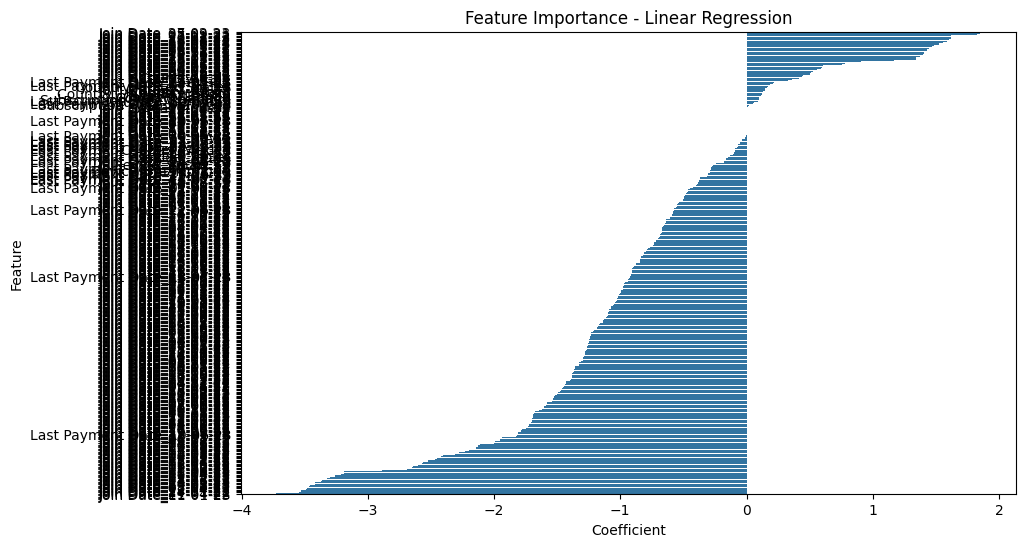

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=lr_coefficients)
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.ylim(lr_coefficients['Feature'].iloc[-1], lr_coefficients['Feature'].iloc[0])
plt.show()

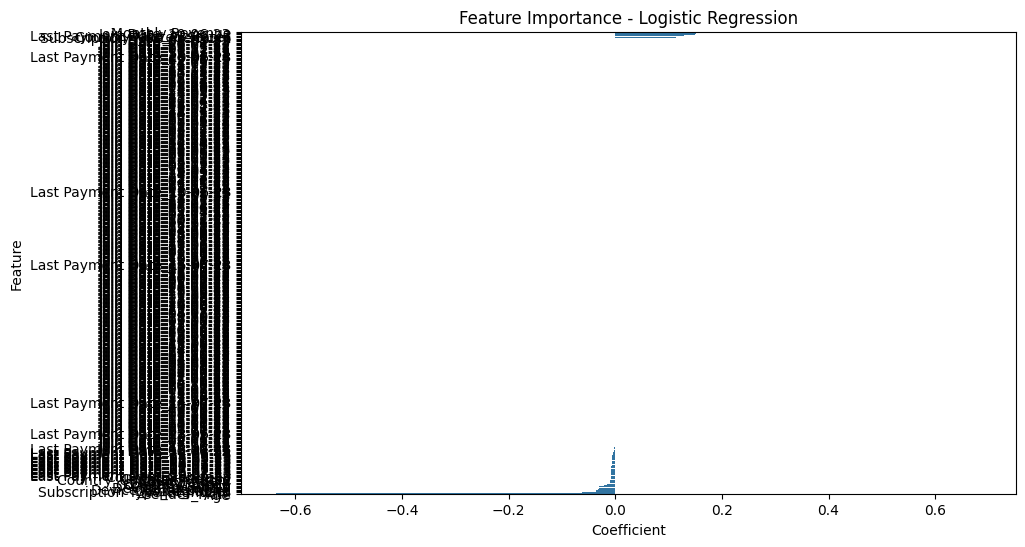

In [ ]:
# Visualization of Feature Importance for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=logistic_coefficients)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.ylim(logistic_coefficients['Feature'].iloc[-1], logistic_coefficients['Feature'].iloc[0])
plt.show()

# **Discussion:**



**Model Predictions**


---



• Linear Regression Model:

*According to the linear regression model, the Netflix standard package has been deemed the most popular with a monthly revenue of 12 units. This would suggest that people prefer average options over premium or basic subscriptions.*


---

• Logistic Regression Model:

*Due to the absence of a “feedback” column in the given CSV file, I used Age as a replacement; however, it is necessary to indicate that this substitution might not exactly reflect feelings of feedback. In the absence of the actual “feedback” information, drawing conclusions about user sentiments is hard.*


---

• Monthly Revenue Influence:

*According to the study, monthly revenue is most strongly influenced by age. Younger people are much more predisposed to buying Netflix subscriptions; thus, targeting this age group may contribute to an increased rate of revenue.*


---

• Feedback Influence:

*Given the absence of the “feedback” column in the CSV file, it’s difficult to say anything about feedback influence. However, including this data in our analysis would be beneficial in identifying user satisfaction and preferences, contributing to making more informed decisions.*
